# Clasificación con el Algoritmo K Nearest Neighbors
#### UD2. Aprendizaxe Supervisada
#### MP. Sistemas de Aprendizaxe Automáticos
#### IES de Teis (Vigo), Cristina Gómez Alonso

En este nuevo notebook presentaremos el algoritmo de clasificación K Nearest Neighbors (K Vecinos más cercanos) dónde se estima la probabilidad de que un elemento pertenezca a una clase mediante el cálculo de la distancia euclídea a otros ejemplos cercanos en el espacio de los elementos.
k-nn es un algoritmo de tipo de aprendizaje vago (lazy learning) ya que la función se aproxima solo localmente y todo el cómputo es diferido a la clasificación.


### *Ejercicio 0: Importación*

Carga en un dataframe el reviews_sentiment.csv y muestra las primeras 10 filas. ¿De qué trata este dataset? Utiliza funciones de EDA para entender su contenido y sus opciones.

In [23]:
import pandas as pd
df = pd.read_csv("data/reviews_sentiment.csv", sep = ";")
df.head(10)

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784
5,Buena,Nada del otro mundo pero han mejorado mucho,8,positive,negative,1,-0.720443
6,De gran ayuda,"Lo malo q necesita de …,pero la app es muy buena",23,positive,negative,1,-0.726825
7,Muy buena,"Estaba más acostumbrado al otro diseño, pero e...",16,positive,negative,1,-0.736769
8,Ta to guapa.,Va de escándalo,21,positive,negative,1,-0.765284
9,Se han corregido,Han corregido muchos fallos pero el diseño es ...,13,negative,negative,1,-0.797961


## 1. Importanción de librerías

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## 2. Preparación de los datos

In [25]:
X = df[['wordcount','sentimentValue']].values
y = df['Star Rating'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## 3. Creación del modelo

In [26]:
n_neighbors = 7

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.90
Accuracy of K-NN classifier on test set: 0.86


## 4. Análisis de los resultados

Matriz de confusión: Matriz con los elementos y cómo se han clasificado<br/>
    - TP(True positive): elementos clasificados bien como verdadero<br/>
    - TN(True Negative): Elementos clasificados bien como falso<br/>
    - FN(False Negative): Elementos clasificados mal como negativos<br/>
    - FP(False Positive): Elementos clasificados mal como positivos<br/>

    accuracy = (TP + TN) / total
    precision = TP / (TP + FP) // Se optimiza cuando no queremos Falsos positivos
    recall = TP / (TP + FN) // Se optimiza cuando no queremos falsos negativos

In [27]:
pred = knn.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 9  0  1  0  0]
 [ 0  1  0  0  0]
 [ 0  1 17  0  1]
 [ 0  0  2  8  0]
 [ 0  0  4  0 21]]
              precision    recall  f1-score   support

           1       1.00      0.90      0.95        10
           2       0.50      1.00      0.67         1
           3       0.71      0.89      0.79        19
           4       1.00      0.80      0.89        10
           5       0.95      0.84      0.89        25

    accuracy                           0.86        65
   macro avg       0.83      0.89      0.84        65
weighted avg       0.89      0.86      0.87        65



## 5. Gráficos de la clasificación obtenida

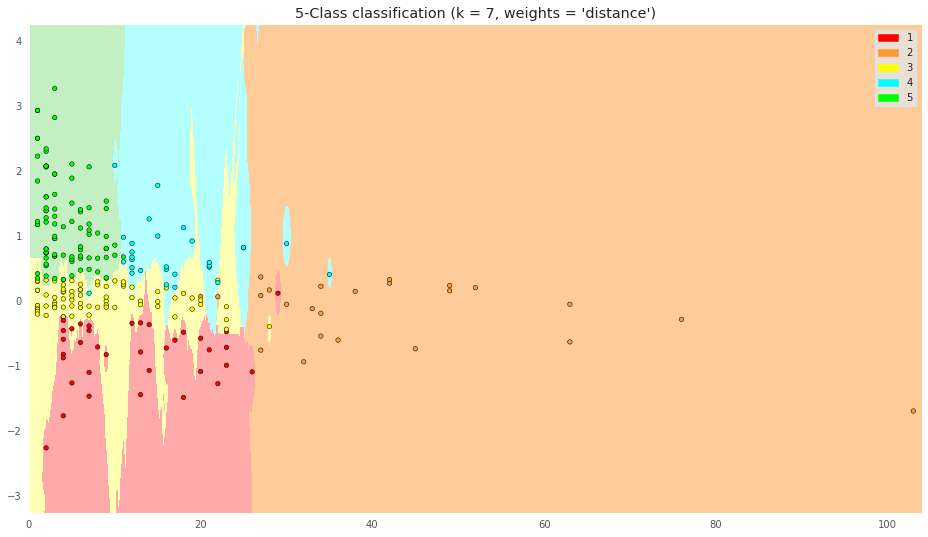

In [28]:
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#ffcc99', '#ffffb3','#b3ffff','#c2f0c2'])
cmap_bold = ListedColormap(['#FF0000', '#ff9933','#FFFF00','#00ffff','#00FF00'])

# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(n_neighbors, weights='distance')
clf.fit(X, y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

patch0 = mpatches.Patch(color='#FF0000', label='1')
patch1 = mpatches.Patch(color='#ff9933', label='2')
patch2 = mpatches.Patch(color='#FFFF00', label='3')
patch3 = mpatches.Patch(color='#00ffff', label='4')
patch4 = mpatches.Patch(color='#00FF00', label='5')
plt.legend(handles=[patch0, patch1, patch2, patch3,patch4])


plt.title("5-Class classification (k = %i, weights = '%s')"
          % (n_neighbors, 'distance'))

plt.show()


## 6. Cálculo del mejor K

([<matplotlib.axis.XTick at 0x7f130dd09b80>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

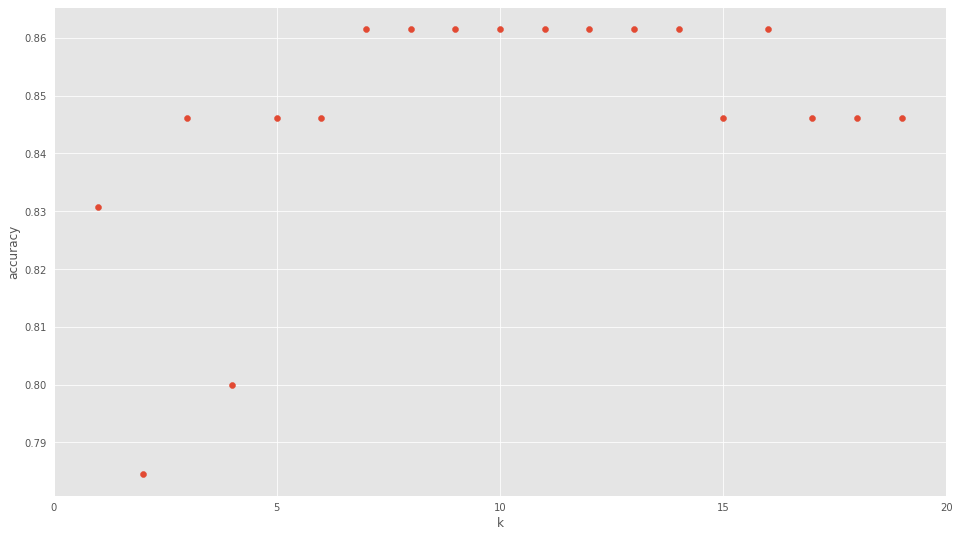

In [29]:
k_range = range(1, 20)
scores = []
for k in k_range:
      knn = KNeighborsClassifier(n_neighbors = k)
      knn.fit(X_train, y_train)
      scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

## 7. Cálculo de predicciones

In [30]:
print(clf.predict([[5, 1.0]]))

[5]


In [31]:
print(clf.predict_proba([[20, 0.0]]))

[[0.00381998 0.02520212 0.97097789 0.         0.        ]]


## *Ejercicio Final*

Toma como referencia la imagen "films.png" y crea un dataset que represente dichos datos. Aplica el algoritmo KNN para clasificar nuevas películas.

,love,kiss,inspector,murderer,class
0,10,5,2,0,1
1,8,6,0,1,1
2,7,4,0,0,1
3,0,1,12,20,2
4,1,0,8,56,2
5,5,6,2,0,1
6,1,0,12,4,2


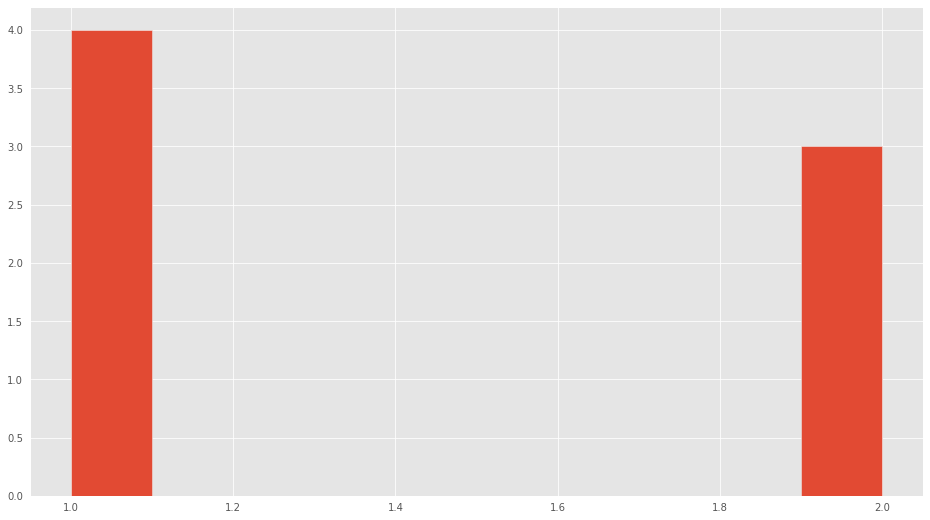

In [40]:
df_films = pd.DataFrame([[10,5,2,0,1],
                   [8,6,0,1,1],
                   [7,4,0,0,1],
                   [0,1,12,20,2],
                   [1,0,8,56,2],
                  [5,6,2,0,1],
                  [1,0,12,4,2]],
                  columns=['love','kiss','inspector','murderer','class'])
df_films.shape
df_films.describe()
df_films["class"].hist()
df_films

In [33]:
y = df_films["class"]
X = df_films.drop(["class"], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

([<matplotlib.axis.XTick at 0x7f12ce4cc790>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

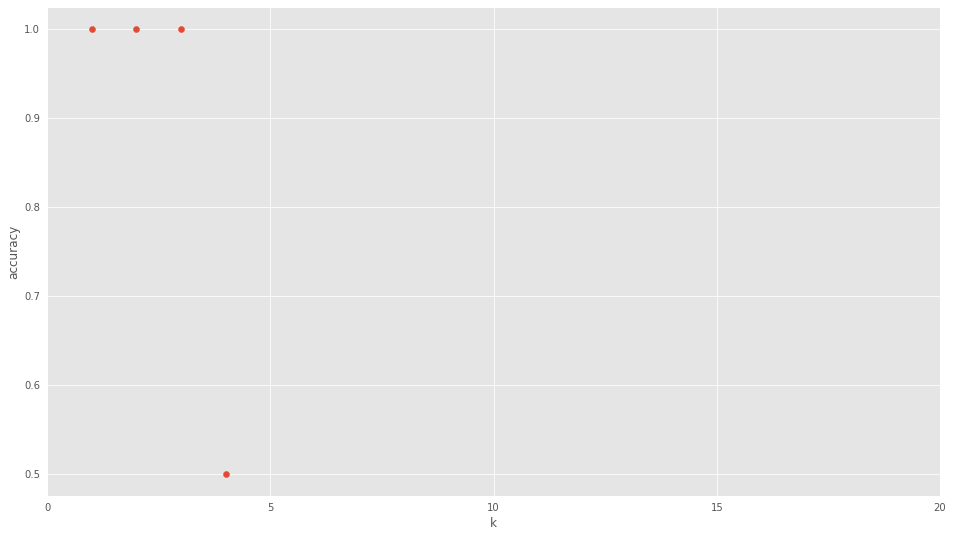

In [34]:
k_range = range(1, 5)
scores = []
for k in k_range:
      knn = KNeighborsClassifier(n_neighbors = k)
      knn.fit(X_train, y_train)
      scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

La mejor K nos da entre 1 y 3 los datos no son suficientes para que sea una muestra muy fiable.

In [35]:
n_neighbors = 2

knn = KNeighborsClassifier(n_neighbors)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 1.00


In [36]:
print(knn.predict([[12, 1, 2,3]]))

[1]


In [39]:
print(clf.predict_proba([[20, 0.0]]))

[[0.00381998 0.02520212 0.97097789 0.         0.        ]]


# Webgrafia

[Wikipedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)
[Libro "Hands on Machine Learning with ScikitLearn, Keras y TensorFlow" de Aurelien Geron y su repositorio de ejemplos ](https://github.com/ageron/handson-ml)
[Aprende ML de Juan Ignacio Bagnato](https://www.aprendemachinelearning.com/clasificar-con-k-nearest-neighbor-ejemplo-en-python/)
[Curso de Tirtjakupto Sarkar](https://github.com/tirthajyoti/Machine-Learning-with-Python)
[DataCamp](https://www.datacamp.com/)


# Licencia

[Attributon-ShacerAlike 4.0 International](https://creativecommons.org/licenses/by-sa/4.0/)

Puedes utilizar libremente este material, con las siguientes condiciones:

* Atribuir la autoría a este documento.
* Si lo utilizas y haces cambios, deberás liberarlo también bajo la misma licencia.